<a href="https://colab.research.google.com/github/Hello-Hyuk/Credit_card_fraud/blob/main/%5BBaseline%5D_Anomaly_Detection_with_IsolationForest_(%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 소현용
%cd /content/drive/MyDrive/AI_project/6.Credit_card_fraud/Credit_card_fraud

! git config --global user.email "baeksh.0420@gmail.com"
! git config --global user.name "baeksh0420"

/content/drive/MyDrive/AI_project/6.Credit_card_fraud/Credit_card_fraud


In [ ]:
# ! echo ref: refs/heads/main >.git/HEAD

In [ ]:
# ! git checkout -b feature/baeksh0420
# ! git push --set-upstream origin feature/baeksh0420

fatal: A branch named 'feature/baeksh0420' already exists.
Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 1.59 KiB | 116.00 KiB/s, done.
Total 6 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 2 local objects.
remote: 
remote: Create a pull request for 'feature/baeksh0420' on GitHub by visiting:
remote:      https://github.com/Hello-Hyuk/Credit_card_fraud/pull/new/feature/baeksh0420
remote: 
To https://github.com/Hello-Hyuk/Credit_card_fraud
 * [new branch]      feature/baeksh0420 -> feature/baeksh0420
Branch 'feature/baeksh0420' set up to track remote branch 'feature/baeksh0420' from 'origin'.


In [6]:
! git checkout feature/baeksh0420

M	"[Baseline]_Anomaly_Detection_with_IsolationForest_(\341\204\207\341\205\265\341\204\214\341\205\265\341\204\203\341\205\251\341\204\222\341\205\241\341\206\250\341\204\211\341\205\263\341\206\270).ipynb"
M	"[Baseline]_Anomaly_Detection_with_IsolationForest_(\353\271\204\354\247\200\353\217\204\355\225\231\354\212\265).ipynb"
Already on 'feature/baeksh0420'
Your branch is up to date with 'origin/feature/baeksh0420'.


In [ ]:
! git add /content/drive/MyDrive/AI_project/6.Credit_card_fraud/Credit_card_fraud/[Baseline]_Anomaly_Detection_with_IsolationForest_(비지도학습).ipynb
! git commit -m "try model"
! git push

On branch feature/baeksh0420
nothing to commit, working tree clean
fatal: The current branch feature/baeksh0420 has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin feature/baeksh0420



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.cluster import *

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')
# 

## Data Load

In [8]:
train_df = pd.read_csv('dataset/train.csv') # Train
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [9]:
val_df = pd.read_csv('dataset/val.csv') # Validation
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


## Train/Validation Feature 분포 확인

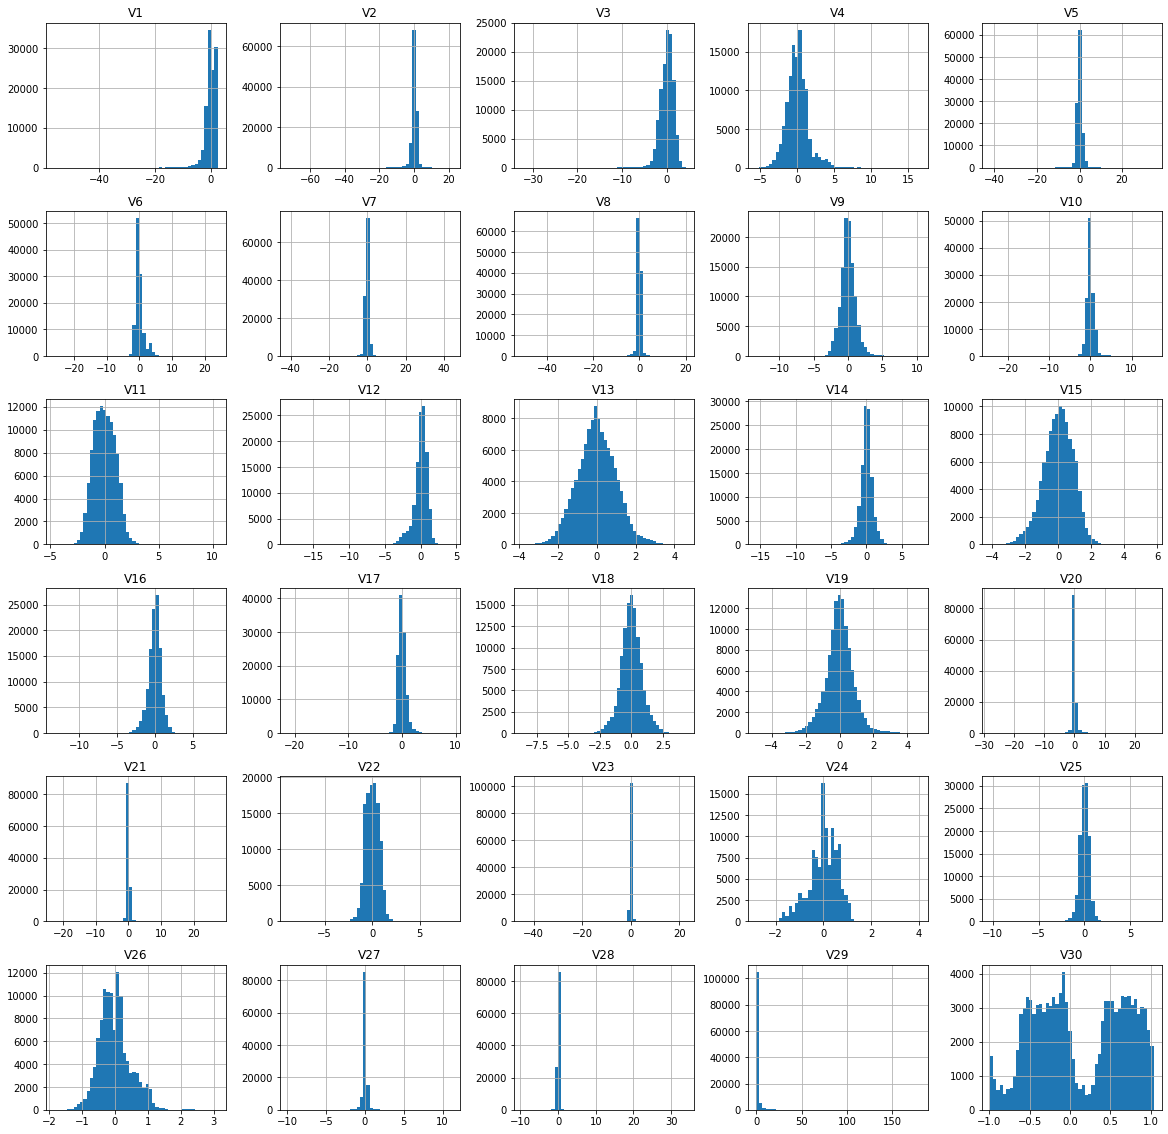

In [10]:
train_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()
# 트레인

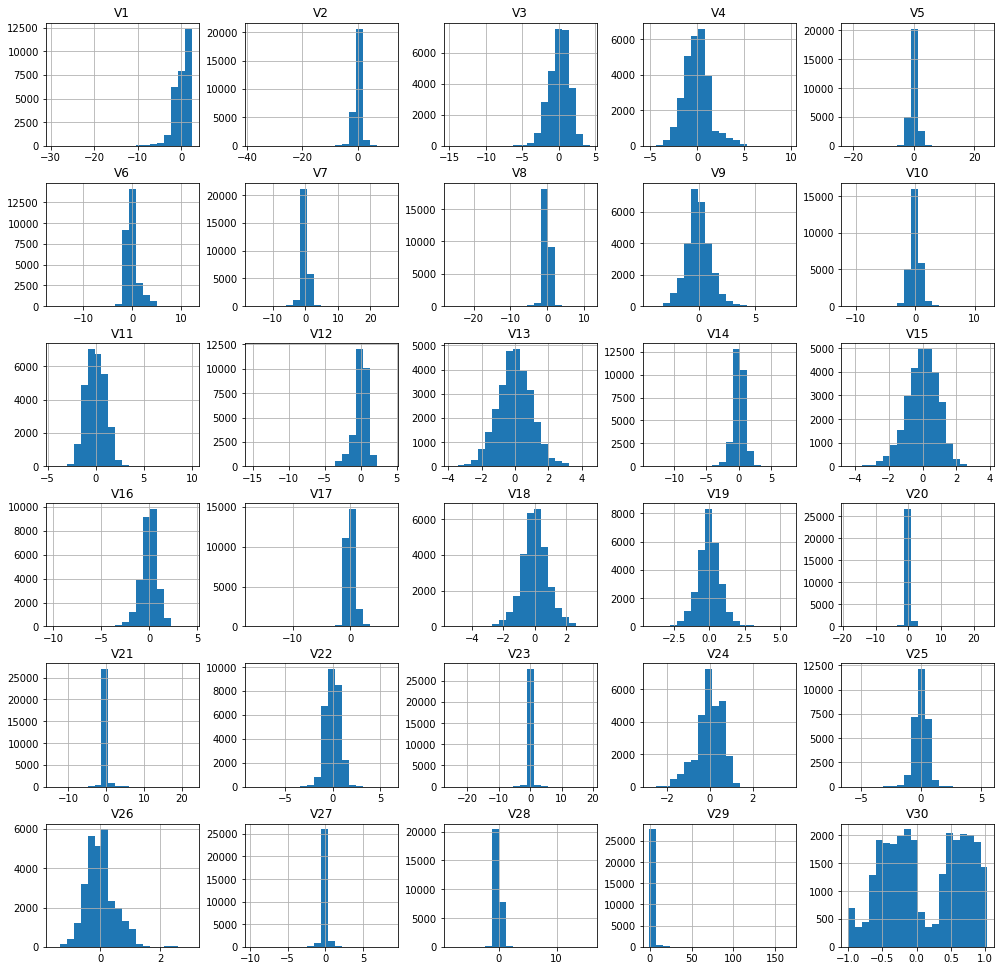

In [11]:
val_df.loc[(val_df["Class"]==False)].drop(columns=['ID', 'Class']).hist(bins = 20, figsize = (17,17))
plt.show()
# 정상 거래

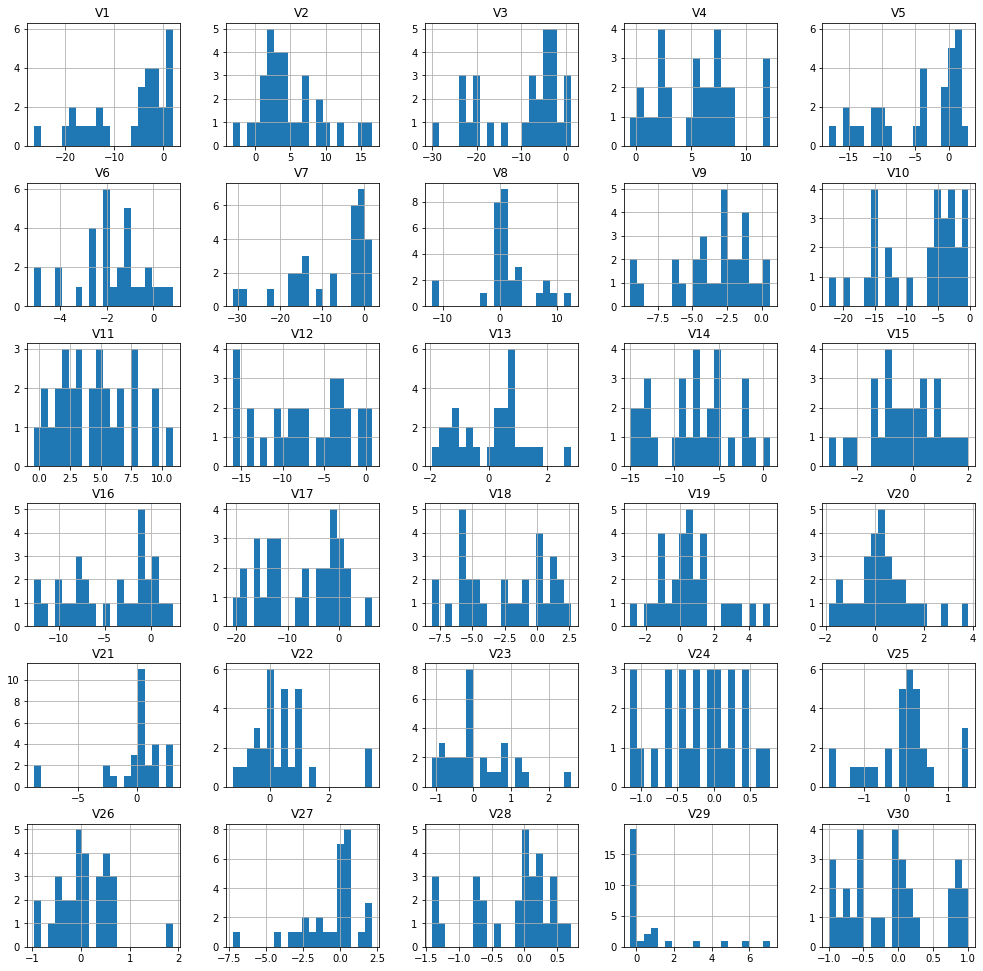

In [12]:
val_df.loc[(val_df["Class"]==True)].drop(columns=['ID', 'Class']).hist(bins = 20, figsize = (17,17))
plt.show()
# 사기 거래

## Validation set 사기 거래 비율
#### (*) Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [13]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


## Model Define & Fit

In [14]:
from sklearn.mixture import GaussianMixture

In [15]:
# DBSCAN

# val_x = val_df.drop(columns = ['ID', 'Class']) # Input Data
val_x = val_df.loc[:,["V2", "V4", "V5", "V6", "V7", "V9", "V10", "V11", "V12", "V16", "V17", "V18"]]
# val_x = val_df.drop(columns = ['ID', 'Class', 'V1','V3', 'V8', 'V13', 'V14', 'V15', 'V23', 'V27', 'V28', 'V29'])
val_y = val_df['Class'] # Label

model = DBSCAN(eps=0.01, min_samples=10)
model.fit(val_x)
pd.Series(model.labels_).value_counts()
val_pred = np.array(model.labels_)

val_pred = np.where(val_pred != -1, 1, val_pred)
val_pred = np.where(val_pred == -1, 0, val_pred)
print(pd.Series(val_pred).value_counts())

print(classification_report(val_y, val_pred))

0    28440
1       22
dtype: int64
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462



In [26]:
# Train dataset은 Label이 존재하지 않음
train_x = train_df.drop(columns=['ID']) # Input Data
# train_x = train_df.drop(columns = ['ID', 'V1','V2','V5','V7','V8', 'V12', 'V20', 'V21', 'V23', 'V27', 'V28', 'V29']) # 재혁
train_x = train_df.loc[:,["V2", "V4", "V5", "V6", "V7", "V9", "V10", "V11", "V12", "V16", "V17", "V18"]] # 분포비교

train_x.head()

,V2,V4,V5,V6,V7,V9,V10,V11,V12,V16,V17,V18
0,-1.340163,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-2.890083,1.109969,-0.121359
1,-0.185226,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-1.059647,-0.684093,1.965775
2,0.960523,-0.168252,0.420987,-0.029728,0.476201,-0.568671,-0.371407,1.341262,0.359894,0.401726,-0.058133,0.068653
3,1.417964,-0.492199,0.948934,0.428118,1.120631,0.615375,1.249376,-0.619468,0.291474,-0.076127,-1.222127,-0.358222
4,0.286157,-0.271526,2.669599,3.721818,0.370145,-0.392048,-0.410430,-0.705117,-0.110452,-0.210077,-0.499768,0.118765


In [82]:
# PCA 적용
from sklearn.decomposition import PCA

# train_x = train_df.drop(columns=['ID']) # Input Data
train_x = train_df.loc[:,["V2", "V4", "V5", "V6", "V7", "V9", "V10", "V11", "V12", "V16", "V17", "V18"]] # 분포비교

pca = PCA(n_components = 12)
pca.fit(train_x)
train_x = pca.transform(train_x)

pd.DataFrame(train_x)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.310464,0.292872,0.544742,-1.792416,0.954961,1.450538,-0.272421,0.618942,-0.152826,-3.062340,0.400155,0.165970
1,0.155290,-0.873441,-0.106401,-1.254553,0.362491,1.348295,0.124599,-0.158616,-0.375762,-0.919055,-2.111250,0.167586
2,-0.971829,-0.110995,-0.438363,0.055997,0.539446,0.485093,0.282056,1.408011,0.133975,0.377948,-0.074496,-0.008744
3,-1.470469,-0.301764,-0.911823,-0.332921,0.986139,-0.504708,-1.363542,-0.693325,-1.039452,0.502796,-0.092397,0.702026
4,-0.352484,0.079681,-2.680735,-3.693838,0.675685,0.292649,0.291395,-0.744819,-0.239608,-0.005262,-0.295482,0.283574
...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-10.175444,-2.738920,4.595598,1.490749,-5.452552,-3.607945,-7.420378,-0.586056,-3.993737,1.189848,0.640036,-2.315153
113838,0.155697,1.520150,0.261560,0.641105,0.054272,-0.589365,0.064445,-0.924474,-1.071878,-0.332322,0.309494,0.255072
113839,-0.724574,-0.408830,-0.260834,1.391149,0.903673,-0.156258,0.208529,-0.644039,-0.208575,-0.061953,0.740022,0.471781
113840,-0.969129,-0.574985,-1.181411,0.279530,0.885232,0.109256,0.550431,0.692925,0.172711,0.489869,-0.295019,-0.389548


In [83]:
# 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
model = IsolationForest(n_estimators=125, max_samples=len(train_x), contamination=0.001, random_state=42, verbose=0)
# model = KMeans(n_clusters=2, random_state=42, max_iter = 10000, tol = 0.0000001, algorithm="full")
# model = GaussianMixture(n_components=2, random_state=42, covariance_type = "spherical", max_iter = 10000)
# model = AgglomerativeClustering() # 세션다운
model.fit(train_x)

train_pred = model.predict(train_x) # model prediction
print(pd.Series(train_pred).value_counts())

 1    113728
-1       114
dtype: int64


## Evaluation : Validation set

In [84]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [85]:
# val_x = val_df.drop(columns = ['ID', 'Class']) # Input Data
val_x = val_df.loc[:,["V2", "V4", "V5", "V6", "V7", "V9", "V10", "V11", "V12", "V16", "V17", "V18"]] # 분포비교
val_x = pca.transform(val_x)
# val_x = val_df.drop(columns = ['ID', 'Class', 'V1','V2','V5','V7','V8', 'V12', 'V20', 'V21', 'V23', 'V27', 'V28', 'V29']) # 재혁
# val_x = val_df.loc[:,["V2", "V4", "V5", "V6", "V7", "V9", "V10", "V11", "V12", "V16", "V17", "V18"]] # 분포비교

val_y = val_df['Class'] # Label

val_pred = model.predict(val_x) # model prediction
print(pd.Series(val_pred).value_counts())
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f"실제 사기 거래\n {val_y.value_counts()} \n예측 사기 거래\n{pd.Series(val_pred).value_counts()}")
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

 1    28437
-1       25
dtype: int64
실제 사기 거래
 0    28432
1       30
Name: Class, dtype: int64 
예측 사기 거래
0    28437
1       25
dtype: int64
Validation F1 Score : [0.754308066864996]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.56      0.47      0.51        30

    accuracy                           1.00     28462
   macro avg       0.78      0.73      0.75     28462
weighted avg       1.00      1.00      1.00     28462



## Inference : Test set

In [ ]:
test_df = pd.read_csv('dataset/test.csv') # Train
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [ ]:
test_x = test_df.drop(columns=['ID'])

In [ ]:
test_pred = model.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

## Submission

In [ ]:
submit = pd.read_csv('dataset/sample_submission.csv')
submit.head()

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [ ]:
submit['Class'] = test_pred
submit.to_csv('dataset/submit.csv', index=False)